In [143]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
df = pd.read_csv('dataset.csv', index_col = 0)

In [145]:
df.rename(columns = {'default payment next month': 'Default',
                     'BILL_AMT1': 'September_bill',
                     'BILL_AMT2': 'August_bill',
                     'BILL_AMT3': 'July_bill',
                     'BILL_AMT4': 'June_bill',
                     'BILL_AMT5': 'May_bill',
                     'BILL_AMT6': 'April_bill', 
                     'PAY_0': 'September_status',
                     'PAY_2': 'August_status',
                     'PAY_3': 'July_status',
                     'PAY_4': 'June_status',
                     'PAY_5': 'May_status',
                     'PAY_6': 'April_status',
                     'PAY_AMT1': 'September_payment',
                     'PAY_AMT2': 'August_payment',
                     'PAY_AMT3': 'July_payment',
                     'PAY_AMT4': 'June_payment',
                     'PAY_AMT5': 'May_payment',
                     'PAY_AMT6': 'April_payment',}, inplace = True)

In [146]:
df['SEX'] = np.where(df['SEX'] == 1, 1, 0)

In [147]:
edu_dict = {1: 1,
           2: 2,
           3: 3,
           4: 4,
           0: 4, 
           5: 4, 
           6: 4}

df['EDUCATION'] = df['EDUCATION'].replace(edu_dict)

In [148]:
marriage_dict = {0: 2,
                1:1,
                2:2,
                3:2}

df['MARRIAGE'] = df['MARRIAGE'].replace(marriage_dict)

In [149]:
status_dict = {-2:-1}

df['September_status'] = df['September_status'].replace(status_dict)
df['August_status'] = df['August_status'].replace(status_dict)
df['July_status'] = df['July_status'].replace(status_dict)
df['June_status'] = df['June_status'].replace(status_dict)
df['May_status'] = df['May_status'].replace(status_dict)
df['April_status'] = df['April_status'].replace(status_dict)

In [131]:
default = df[df['Default'] == 1]
no_default = df[df['Default'] == 0]

In [132]:
len(default)

4977

In [133]:
len(no_default)

17523

___

# Possibility to use this to organize the payments made for known bill amounts

In [ ]:
Bills_for_payments = [(df['BILL_AMT2'][i] + df['BILL_AMT3'][i] + df['BILL_AMT4'][i] + 
                       df['BILL_AMT5'][i] + df['BILL_AMT6'][i]) for i in range(len(df['BILL_AMT1']))]

In [ ]:
df['bill_for_known_payments'] = Bills_for_payments

In [ ]:
Payments_for_bills = [(df['PAY_AMT1'][i] + df['PAY_AMT2'][i] + df['PAY_AMT3'][i] + 
                       df['PAY_AMT4'][i] + df['PAY_AMT5'][i]) for i in range(len(df['PAY_AMT1']))]

In [ ]:
df['payments_for_known_bills'] = Payments_for_bills

In [ ]:
df['balance_left'] = [df['payments_for_known_bills'][i] - df['bill_for_known_payments'][i] 
                      for i in range(len(df['bill_for_known_payments']))]

In [ ]:
df['balance_left'].describe()

___

# General EDA to find any kind of correlation

In [44]:
columns = df.columns

In [45]:
for x in columns[:11]:
    print(x, sorted(df[x].unique()))

LIMIT_BAL [10000, 16000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 327680, 330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000, 410000, 420000, 430000, 440000, 450000, 460000, 470000, 480000, 490000, 500000, 510000, 520000, 530000, 540000, 550000, 560000, 570000, 580000, 590000, 600000, 610000, 620000, 630000, 640000, 650000, 660000, 670000, 680000, 700000, 710000, 720000, 750000, 760000, 780000, 800000, 1000000]
SEX [0, 1]
EDUCATION [1, 2, 3, 4]
MARRIAGE [1, 2]
AGE [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 79]
September_status [0, 1, 2, 3, 4, 5, 6, 7, 8]
August_status [0, 1, 2, 3, 4, 5, 6, 7]
July_status [0,

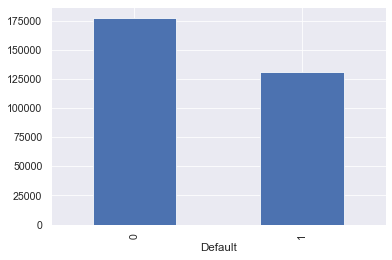

In [46]:
df.groupby('Default')['LIMIT_BAL'].mean().plot.bar(legend = False)

Balance Limit vs Default


Defaulted
count      4977.000000
mean     130644.500703
std      115953.954395
min       10000.000000
25%       50000.000000
50%       90000.000000
75%      200000.000000
max      710000.000000
Name: LIMIT_BAL, dtype: float64
--------------------------------------------------------------------------------
Did Not Default
             count           mean            std      min      25%       50%  \
LIMIT_BAL  17523.0  177669.120584  131101.523616  10000.0  60000.0  150000.0   

                75%        max  
LIMIT_BAL  250000.0  1000000.0  


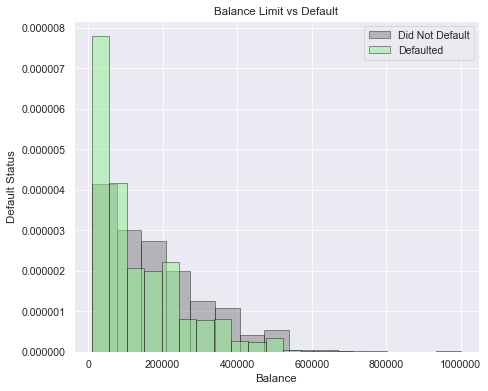

In [47]:
print('Balance Limit vs Default')
print('\n')
print('Defaulted')
print(df[df['Default']==1]['LIMIT_BAL'].describe().transpose())
print('--'*40)
print('Did Not Default')
print(df[df['Default']==0][['LIMIT_BAL']].describe().transpose())
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,14))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['Default'] ==0].LIMIT_BAL, bins = 15, label ='Did Not Default',density=True,  alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(df[df['Default']==1].LIMIT_BAL, bins = 15, label = 'Defaulted', density=True, alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Balance Limit vs Default')
ax1.set_xlabel('Balance')
ax1.set_ylabel('Default Status')
ax1.legend(loc = 'upper right')

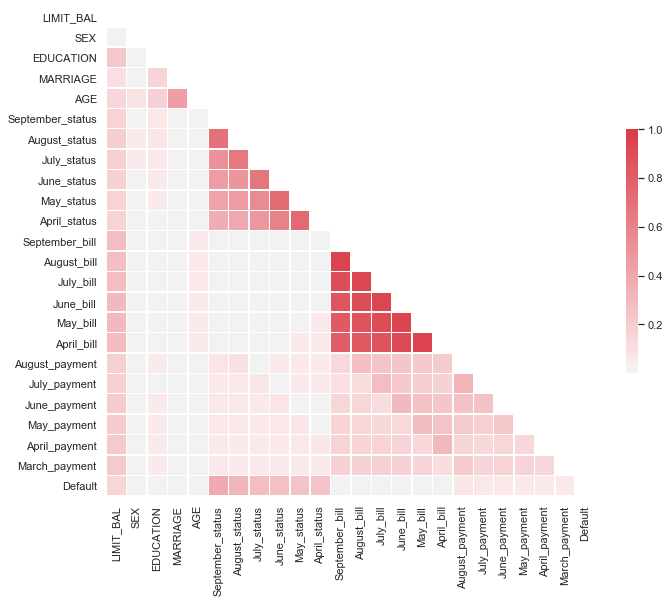

In [48]:
sns.set(style="white")


# Compute the correlation matrix
corr = np.abs(df.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,September_status,August_status,July_status,June_status,May_status,...,June_bill,May_bill,April_bill,August_payment,July_payment,June_payment,May_payment,April_payment,March_payment,Default
LIMIT_BAL,NaN,0.027786,0.229968,0.102951,0.144338,0.170397,0.199425,0.192759,0.181867,0.169835,...,0.297081,0.299122,0.292186,0.193930,0.185436,0.207461,0.204746,0.213842,0.218610,0.150855
SEX,NaN,NaN,0.012341,0.032335,0.084107,0.038133,0.044348,0.040899,0.035832,0.036120,...,0.024464,0.017746,0.015860,0.000013,0.005674,0.009696,0.002076,0.000857,0.001893,0.037813
EDUCATION,NaN,NaN,NaN,0.157385,0.183950,0.055678,0.066075,0.054580,0.054482,0.043600,...,0.005997,0.012500,0.012906,0.039463,0.032871,0.042329,0.043992,0.044212,0.043254,0.033165
MARRIAGE,NaN,NaN,NaN,NaN,0.451852,0.011342,0.006298,0.009391,0.004839,0.000280,...,0.019037,0.021270,0.015427,0.009963,0.007302,0.000064,0.010458,0.001284,0.009989,0.028126
AGE,NaN,NaN,NaN,NaN,NaN,0.006097,0.017187,0.024716,0.019337,0.019285,...,0.045040,0.045188,0.043316,0.025407,0.020186,0.025558,0.020936,0.022432,0.019743,0.014292
September_status,NaN,NaN,NaN,NaN,NaN,NaN,0.701373,0.515652,0.456734,0.422610,...,0.014271,0.021793,0.023517,0.076235,0.060359,0.061312,0.061979,0.054420,0.049963,0.390012
August_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660066,0.506813,0.456269,...,0.028150,0.034576,0.038486,0.094364,0.059086,0.057071,0.054802,0.046234,0.043575,0.322132
July_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.678828,0.555382,...,0.014021,0.022425,0.026390,0.035931,0.077383,0.053305,0.052241,0.047787,0.047809,0.284630
June_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.749208,...,0.011905,0.023526,0.029351,0.054459,0.038797,0.071451,0.055331,0.051725,0.049951,0.268623
May_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.021841,0.032927,0.039986,0.052419,0.040766,0.036064,0.064632,0.051485,0.046551,0.257197


___

# Trying to Clean up all the unkown data

### Since the values for -2, -1 are all similar for all 6 months of the Payment status they are all going to be grouped up as -1 for payed duly. 

##### This is subject to change as there are a lot of values in these categories so if i find there is a better correlation later i may change as i go along

In [4]:
(df.groupby('September_status')['Default'].sum() / df.groupby('September_status')['Default'].count())*100

September_status
-2    13.212181
-1    17.230913
 0    12.880499
 1    33.562885
 2    68.434217
 3    75.298805
 4    64.285714
 5    47.058824
 6    60.000000
 7    80.000000
 8    53.846154
Name: Default, dtype: float64

In [20]:
(df.groupby('September_status')['Default'].sum() / df.groupby('September_status')['Default'].count())*100

September_status
0    13.990799
1    33.562885
2    68.434217
3    75.298805
4    64.285714
5    47.058824
6    60.000000
7    80.000000
8    53.846154
Name: Default, dtype: float64

In [5]:
(df.groupby('August_status')['Default'].sum() / df.groupby('August_status')['Default'].count())*100

August_status
-2    18.406004
-1    16.503161
 0    15.888484
 1    27.777778
 2    54.616429
 3    66.527197
 4    47.945205
 5    57.894737
 6    66.666667
 7    53.846154
Name: Default, dtype: float64

In [21]:
(df.groupby('August_status')['Default'].sum() / df.groupby('August_status')['Default'].count())*100

August_status
0    16.402585
1    27.777778
2    54.616429
3    66.527197
4    47.945205
5    57.894737
6    66.666667
7    53.846154
Name: Default, dtype: float64

In [6]:
(df.groupby('July_status')['Default'].sum() / df.groupby('July_status')['Default'].count())*100

July_status
-2    18.505104
-1    16.080178
 0    17.379544
 1    50.000000
 2    51.246927
 3    59.016393
 4    55.932203
 5    60.000000
 6    56.250000
 7    83.333333
 8    50.000000
Name: Default, dtype: float64

In [22]:
(df.groupby('July_status')['Default'].sum() / df.groupby('July_status')['Default'].count())*100

July_status
0    17.254740
1    50.000000
2    51.246927
3    59.016393
4    55.932203
5    60.000000
6    56.250000
7    83.333333
8    50.000000
Name: Default, dtype: float64

In [7]:
(df.groupby('June_status')['Default'].sum() / df.groupby('June_status')['Default'].count())*100

June_status
-2     19.151552
-1     16.063029
 0     18.347735
 1    100.000000
 2     52.338435
 3     59.259259
 4     72.916667
 5     44.444444
 6     66.666667
 7     82.222222
 8    100.000000
Name: Default, dtype: float64

In [23]:
(df.groupby('June_status')['Default'].sum() / df.groupby('June_status')['Default'].count())*100

June_status
0     17.990748
1    100.000000
2     52.338435
3     59.259259
4     72.916667
5     44.444444
6     66.666667
7     82.222222
8    100.000000
Name: Default, dtype: float64

In [8]:
(df.groupby('May_status')['Default'].sum() / df.groupby('May_status')['Default'].count())*100

May_status
-2     19.563936
-1     16.726922
 0     18.855799
 2     53.650958
 3     65.034965
 4     56.451613
 5     66.666667
 6     66.666667
 7     84.444444
 8    100.000000
Name: Default, dtype: float64

In [24]:
(df.groupby('May_status')['Default'].sum() / df.groupby('May_status')['Default'].count())*100

May_status
0     18.539132
2     53.650958
3     65.034965
4     56.451613
5     66.666667
6     66.666667
7     84.444444
8    100.000000
Name: Default, dtype: float64

In [9]:
(df.groupby('April_status')['Default'].sum() / df.groupby('April_status')['Default'].count())*100

April_status
-2     20.198129
-1     17.106481
 0     18.752551
 2     50.823643
 3     62.406015
 4     69.230769
 5     62.500000
 6     76.470588
 7     82.352941
 8    100.000000
Name: Default, dtype: float64

In [25]:
(df.groupby('April_status')['Default'].sum() / df.groupby('April_status')['Default'].count())*100

April_status
0     18.660595
2     50.823643
3     62.406015
4     69.230769
5     62.500000
6     76.470588
7     82.352941
8    100.000000
Name: Default, dtype: float64

___

### For Sex i just changed the 2s for women to 0s because it is easier for me to follow

In [10]:
df.groupby('SEX')['Default'].mean()

SEX
1    0.240523
2    0.208453
Name: Default, dtype: float64

In [26]:
df.groupby('SEX')['Default'].mean()

SEX
0    0.208453
1    0.240523
Name: Default, dtype: float64

___

### For Education there were 3 extra unknown items, 0, 5 and 6. All there had ver minimal amounts of people in those categories and no meaningful correlation to the status of whether they are defaulting or not defaulting

In [11]:
df.groupby('EDUCATION')['Default'].mean()

EDUCATION
0    0.000000
1    0.192400
2    0.237720
3    0.249864
4    0.044444
5    0.068293
6    0.171429
Name: Default, dtype: float64

In [27]:
df.groupby('EDUCATION')['Default'].mean()

EDUCATION
1    0.192400
2    0.237720
3    0.249864
4    0.069971
Name: Default, dtype: float64

___

### Only 1 excess category. Weird as it had a very rate of defaulting but with so few people (41) it was not worth keeping seperate. 

##### Possibility to add all the values to the single category as well since the entire section can just be married or not married instead of having an entirely new category of people. only increases the % of defaults by .04

In [12]:
(df.groupby('MARRIAGE')['Default'].sum() / df.groupby('MARRIAGE')['Default'].count())*100

MARRIAGE
0     9.756098
1    23.392666
2    21.001507
3    25.423729
Name: Default, dtype: float64

In [28]:
(df.groupby('MARRIAGE')['Default'].sum() / df.groupby('MARRIAGE')['Default'].count())*100

MARRIAGE
1    23.392666
2    21.049186
Name: Default, dtype: float64

___

# Creating CSV with current data

In [151]:
df.to_csv('Cleaned_default_status.csv')

___

## Just thinking about possible features to add in and testing them out

In [150]:
df['September_balance'] = [df['September_bill'][i] - df['September_payment'][i] 
                       for i in range(len(df['September_payment']))]

df['August_balance'] = [df['August_bill'][i] - df['August_payment'][i] 
                       for i in range(len(df['August_payment']))]

df['July_balance'] = [df['July_bill'][i] - df['July_payment'][i] 
                       for i in range(len(df['July_payment']))]

df['June_balance'] = [df['June_bill'][i] - df['June_payment'][i] 
                       for i in range(len(df['June_payment']))]

df['May_balance'] = [df['May_bill'][i] - df['May_payment'][i] 
                       for i in range(len(df['May_payment']))]

df['April_balance'] = [df['April_bill'][i] - df['April_payment'][i] 
                       for i in range(len(df['April_payment']))]

In [130]:
df.groupby('September_status')['September_balance'].mean()

September_status
0      2897.081817
1     23972.810439
2     59954.252126
3     34372.266932
4     48246.892857
5     93510.176471
6     81405.600000
7    154654.600000
8    125495.076923
9     68179.695059
Name: September_balance, dtype: float64

In [129]:
df.groupby('August_status')['August_balance'].mean()

August_status
0      1892.400271
1     18843.333333
2     45977.251867
3     42262.803347
4     56243.369863
5     68838.631579
6    127851.833333
7    122348.923077
9     63799.999237
Name: August_balance, dtype: float64

In [128]:
df.groupby('July_status')['July_balance'].mean()

July_status
0      2652.184801
1    155925.000000
2     42740.632244
3     39968.748634
4     50910.728814
5     77879.700000
6     97355.000000
7      5742.958333
8     19411.000000
9     59108.314455
Name: July_balance, dtype: float64

In [127]:
df.groupby('June_status')['June_balance'].mean()

June_status
0      2608.925916
1    285801.000000
2     43720.920918
3     44627.770370
4     43020.583333
5     63853.037037
6     32141.666667
7     11136.333333
8      2400.000000
9     53931.152306
Name: June_balance, dtype: float64

In [126]:
df.groupby('May_status')['May_balance'].mean()

May_status
0      2307.633833
2     48063.193164
3     35312.769231
4     57082.725806
5     23257.166667
6    121902.333333
7      5454.355556
8      2400.000000
9     51053.322414
Name: May_balance, dtype: float64

In [120]:
df[df['September_status'] == -2][['September_bill', 'September_payment', 'September_balance',
                                'August_bill', 'August_payment', 'August_balance',
                                'July_bill', 'July_payment', 'July_balance']].mean()

September_bill       8628.743124
September_payment    6648.051572
September_balance    2119.904224
August_bill          8767.955796
August_payment       7451.881631
August_balance       2165.006385
July_bill            9616.888016
July_payment         6255.969057
July_balance         3568.337917
dtype: float64

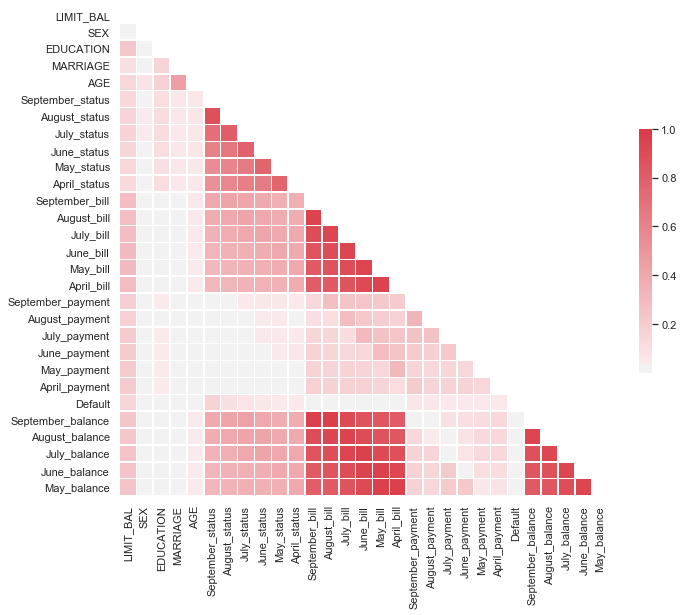

In [125]:
sns.set(style="white")


# Compute the correlation matrix
corr = np.abs(df.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})